<h1>Assignment 3: programming</h1>

This is the programming part of Assignment 3. When you're done, select "Restart and run all" in the Kernel menu, and make sure your code behaves as you expect. There is a theoretical part of the assignment also, found in the Handouts folder on CoCalc, which must be handed in at the <i>start</i> of class on Friday, October 4.

First, run the following code to import packages that we'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import time

<h2>1. Barycentric interpolation</h2>

Run the following code to define and plot a fairly complicated function $f(x)$.

Text(0, 0.5, 'f(x)')

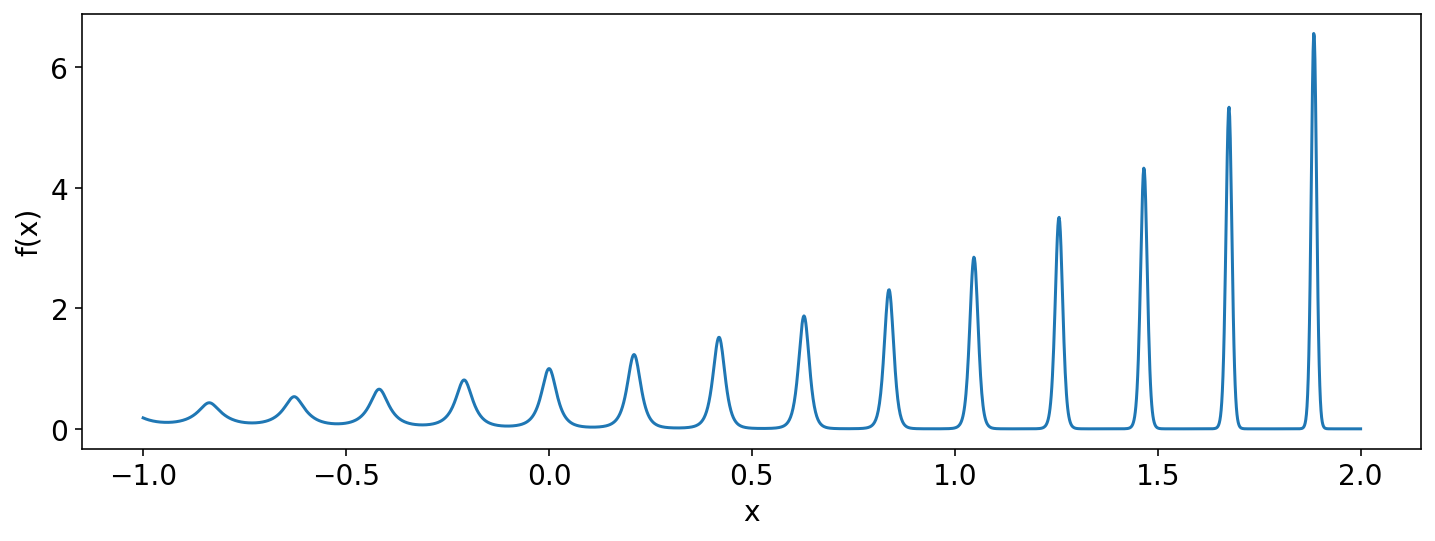

In [2]:
def f(x): return np.exp(x) * np.cosh(4*np.sin(15*x))**(-np.exp(x))

plt.figure(figsize=(12,4))
x = np.linspace(-1,2,2000)
plt.plot(x,f(x))
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

Let $p(x)$ interpolate $f(x)$ at the Chebyshev nodes of the 1st kind, $x_1,\ldots,x_n\in[-1,1]$. Run the following code to compute $p(x)$ for 1000 uniformly spaced $x$ values and $n=300$ interpolation points. This $p(x)$ is computed using the orignal formula for the Lagrange construction, which we have been using for several weeks. The code will measure and print the processor time it takes to compute $p(x)$. To make the timing more accurate, the computation is repeated 10 times, and then the average processor time is calculated.

In [3]:
def lagrange_interp(x,xi,yi):
    P = np.zeros(np.size(x))
    for i in range(0 , len(xi) ):
        L = np.ones(np.size(x))
        for j in range(0 , len(xi) ):
            if i != j: 
                L *= (x-xi[j]) / (xi[i]-xi[j])
        P += yi[i] * L
    return P

def cheb_nodes1(n):
    return np.cos( np.linspace(1/(2*n)*np.pi,(2*n-1)/(2*n)*np.pi,n) )

x = np.linspace(-1,1,1000)
xi = cheb_nodes1(300)
t_start = time.process_time()
for i in range(0,10):
    p = lagrange_interp(x,xi,f(xi))
t_end = time.process_time()

print('The average processor time used to compute p(x) with the original Lagrange formula was',(t_end-t_start)/10)

The average processor time used to compute p(x) with the original Lagrange formula was 0.7507726147


<h4>a. The barycentric formula </h4>

Complete the following function, which uses the barycentric interpolation formula to compute the interpolating polynomial p(x) specifically for the case where the $x_i$ are Chebyshev nodes of the 1st kind. Use the weights $w_i=(-1)^{i+1}\sin\theta_i$. You can check your function against the $p(x)$ computed by the old method using the provided <tt>lagrange_interp</tt> and <tt>cheb_nodes1</tt> functions. Your function should be able to handle the case where an entry of <tt>x</tt> coincides with an interpolation point. One good way to write the function is to loop through x but use vector operations for $x_i$ and $y_i$.

In [4]:
def bary_cheb(x,yi):
    # INPUT
    # x is a number of type float, or a numpy array of values, at which to evaluate p(x)
    # yi is a numpy array of function values at the interpolation points xi, which are the Chebyshev nodes of the 1st kind
    # OUPUT: numpy array of p(x) values, computed using the barycentric formula
    n = np.size(yi)
    m = np.size(x)
    xi = cheb_nodes1(n)
    w = np.zeros(n)
    p = np.zeros(m)
    for i in range(n):
        t = (2*i+1)*np.pi/(2*n)
        w[i]= ((-1)**(i))*np.sin(t)
    yw = yi*w
    for j in range(m):
        if x[j] in xi:
            p[j] = f(x[j])
        else:
            p[j] = (np.sum(yw/(x[j]-xi)))/(np.sum(w/(x[j]-xi))) 
    return p
        
    # your code here

Run the following code to test the speed of your barycentric interpolation function. It should be significantly faster than using the <tt>lagrange_interp</tt> and <tt>cheb_nodes1</tt> functions.

The average processor time used to compute p(x) using the barycentric formula was 0.02313289300000001


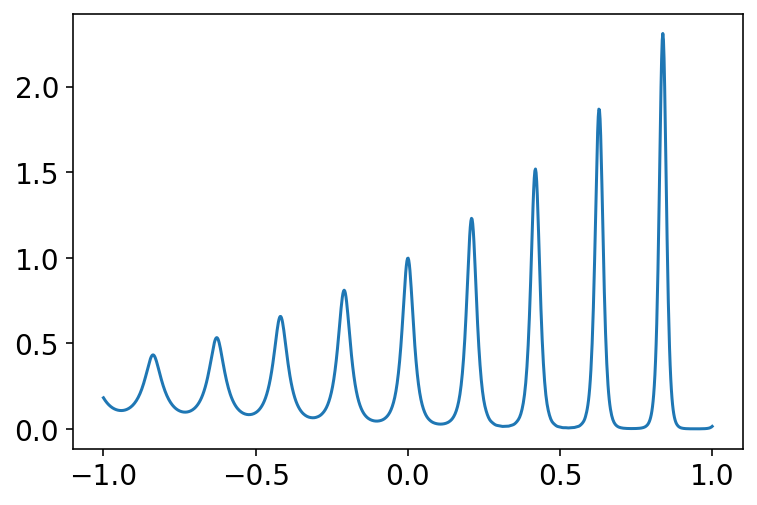

In [5]:
x = np.linspace(-1,1,1000)
xi = cheb_nodes1(300)
t_start = time.process_time()
for i in range(0,10):
    p = bary_cheb(x,f(xi))
t_end = time.process_time()
print('The average processor time used to compute p(x) using the barycentric formula was',(t_end-t_start)/10)

plt.plot(x,p)

<h4>b. Speed tests: Lagrange formula </h4>

Time how long it takes to compute $p(x)$ at 1000 points using the original formula for Lagrange interpolation (<tt>lagrange_interp</tt> and <tt>cheb_nodes1</tt>). As before, run the code 10 times and average to get a more accurate time. Compute the average times for $n=10,20,50,100,200,500$ interpolation points. On a single log-log plot, show time on the vertical axis and n on the horizontal axis. Make sure the axes have appropriate ranges. Confirm that the plotted slope is what you expect. 

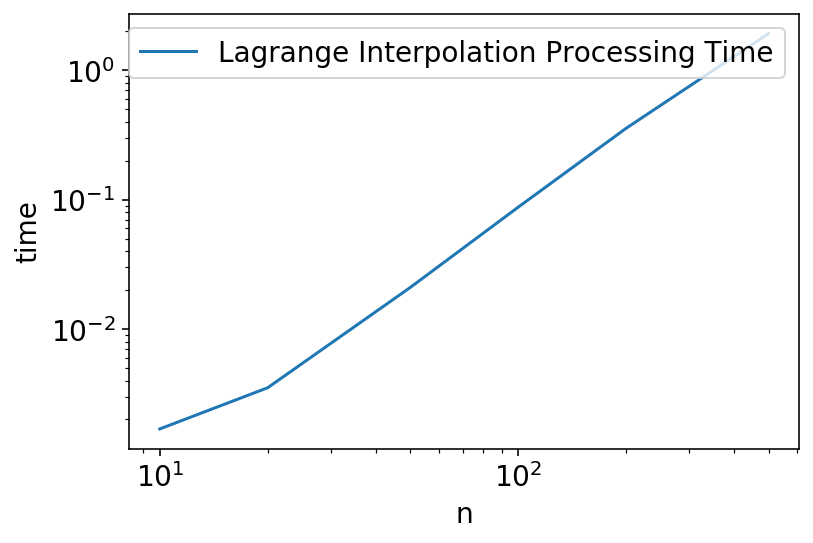

In [6]:
n = np.array([10,20,50,100,200,500])
t = np.zeros(np.size(n))
for i in range(np.size(n)):
    x = np.linspace(-1,1,1000)
    xi = cheb_nodes1(n[i])
    t_start = time.process_time()
    for j in range(0,10):
        p = lagrange_interp(x,xi,f(xi))
    t_end = time.process_time()
    t[i] = (t_end-t_start)/10
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(n,t,label='Lagrange Interpolation Processing Time')
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.show()

<h4>c. Speed tests: Barycentric formula </h4>

Repeat part b using the barycentric formula for Lagrange interpolation, but this time compute the average times only for $n=1000,2000,5000,1e4,2e4,5e4,1e5,2e5$ interpolation points. Confirm that the plotted slope is what you expect.

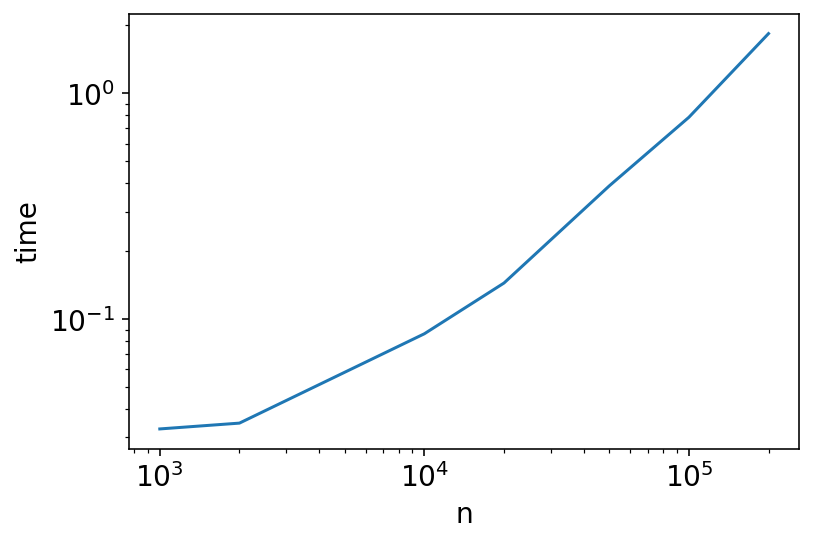

In [7]:
n = np.array([1000,2000,10000,20000,50000,100000,200000])
t = np.zeros(np.size(n))
for i in range(np.size(n)):
    x = np.linspace(-1,1,1000)
    xi = cheb_nodes1(n[i])
    t_start = time.process_time()
    for j in range(0,10):
            p = bary_cheb(x,f(xi))
    t_end = time.process_time()
    t[i] = (t_end-t_start)/10
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(n,t)
plt.xlabel('n')
plt.ylabel('time')

plt.show()

<h2>2. Quadrature by Newton–Cotes rules</h2>

<h4>a.</h4>

Write the following three functions to cary out numerical integration using (1) the method from problem 4 of the theory assignment, (2) the composite trapezoid rule, and (3) the composite Simpson's rule.

In [8]:
def riemann(h,y):
    # h is the step size in x
    # y is a numpy array of f(x) values at a,x1,x2,...,b
    return (h*(np.sum(y)-y[-1]))
    # your code here 
    
def trap(h,y):
    # h is the step size in x
    # y is a numpy array of f(x) values at a,x1,x2,...,b
    return (((h/2)*(y[0]+y[-1]))+ (h*(np.sum(y)-y[0]-y[-1])))
        
    # your code here 

def simp(h,y):
    # h is the step size in x
    # y is a numpy array of f(x) values at a,x1,x2,...,b
    #     length of y should be odd: 2m+1, where h=(b-a)/(2m)
    m = (len(y)-1)//2
    s_odd = s_even = 0
    for i in range (1,m):
        s_even += y[2*i]
        s_odd += y[2*i-1]
    return ((h/3)*(y[0] + y[-1]+ 2*s_even + 4 * s_odd))
    # your code here 

<h4>b.</h4>

Let $f(x)$ be the same function from part 1. Run the following code to approximate the value of $\int_{-1}^2f(x)dx$ using the composite Simpson's rule with $2m=10^6$.

In [9]:
h = (2-(-1))/1e6
truth = simp( h , f(np.linspace(-1,2,int(1e6+1))) )
print( truth )

0.996594338969196


<h4>c.</h4>

For each of the three quadrature methods you implemented in part a, compute the approximate value of $\int_{-1}^2f(x)dx$ using $h=10^{-1},~3\times10^{-2},~10^{-2},~3\times10^{-3},~10^{-3},~3\times10^{-4},~10^{-4}$. Estimate the error in each case by treating your approximation from part 2b as the exact answer. On a single log-log plot, show error magnitude versus $1/h$ for each of the three methods. Include a legend.

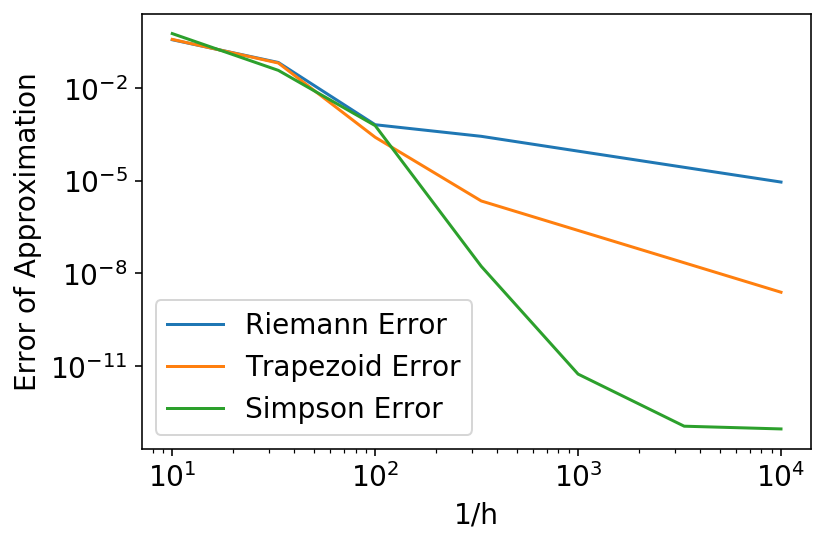

In [10]:
h = np.array([1e-1,3e-2,1e-2,3e-3,1e-3,3e-4,1e-4])
hs = np.size(h)
R_E = np.zeros(hs)
T_E = np.zeros(hs)
S_E = np.zeros(hs)
h_1 = 1/h
for i in range(hs):
    x = np.linspace(-1,2,int(3*h_1[i])+1)
    R_E[i] = np.abs(truth-riemann(h[i],f(x)))
    T_E[i] = np.abs(truth-trap(h[i],f(x)))
    S_E[i] = np.abs(truth-simp(h[i],f(x)))
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(h_1,R_E,label='Riemann Error')
plt.plot(h_1,T_E,label='Trapezoid Error')
plt.plot(h_1,S_E,label='Simpson Error')
plt.xlabel('1/h')
plt.ylabel('Error of Approximation')
plt.legend()
plt.show()    

Based on the plot, what are the approximate rates of convergence for each of the three quadrature methods?